# 로지스틱 회귀 - 분류
- 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
- 2진 분류(binary classification): 데이터가 2개의 범주 중 하나에 속하도록 결정하는 것



로지스틱 회귀에서는 데이터가 특정 범주에 속할 확률을 예측하기 위해 아래와 같은 단계를 거친다.
<pre>
1. 모든 속성(feature)들의 계수(coefficient)와 절편(intercept)을 0으로 초기화한다.
2. 각 속성들의 값(value)에 계수(coefficient)를 곱해서 log-odds를 구한다.
3. log-odds를 sigmoid 함수에 넣어서 [0,1] 범위의 확률을 구한다.
</pre>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

- `Sigmoid` 함수

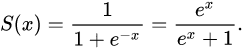

In [6]:
# numpy에는 Sigmoid 함수 제공 X -> 직접 만들어야해ㅠㅠ
def sigmoid(x, a=1, b=0):            # a: 기울기
  return(1. / (1+ np.exp(-a*(x-b))))

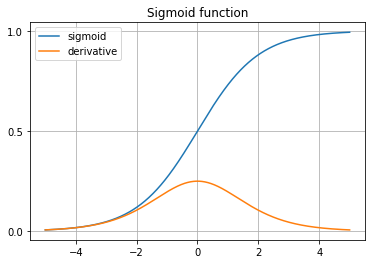

In [7]:
xs = np.linspace(-5, 5, 1000) # 0.01 단위로 -5 ~ 5의 값 / numpy array 구조만 가능. 일반적인 리스트 구조 X
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()
# Sigmoid 함수 => 딥러닝때 많이 쓰임!!!! 
# 함수 코드, 그래프 꼭 알아두기

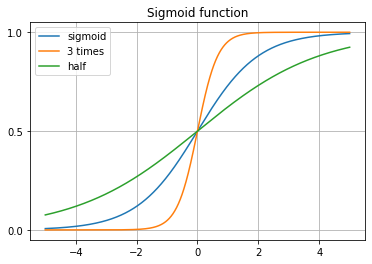

In [8]:
y3 = sigmoid(xs, a=3) # 3배 
y_ahrf = sigmoid(xs, a=0.5)

plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3 times')
plt.plot(xs, y_ahrf, label='half')

plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()


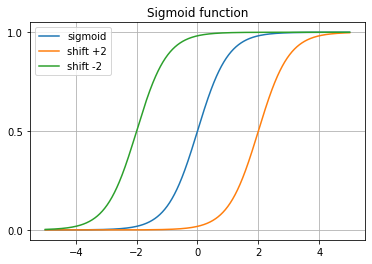

In [10]:
ys = sigmoid(xs, a=2) 

y_plus2 = sigmoid(xs, a = 2, b = 2)
y_minus2 = sigmoid(xs, a = 2, b = -2)

plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y_plus2, label='shift +2')
plt.plot(xs, y_minus2, label='shift -2')

plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

- 이진 분류 (sigmoid 함수 활용)

In [13]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 데이터 shape
cancer.data.shape

(569, 30)

In [14]:
# 로지스틱스 회귀 사용시 정규화/표준화 해야 함 
from sklearn.preprocessing import StandardScaler # 정규화 (표준화 - MinMaxScaler)
cancer_std = StandardScaler().fit_transform(cancer.data)

In [17]:
# train/ test dataset
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2022) # test-size=0.5


In [18]:
# Logistic 회귀 (사실은 분류)
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train) # 학습

LogisticRegression(random_state=2022)

In [19]:
# linear_model -> 학습 후 계수 확인 가능 
lrc.coef_

array([[-0.34405498, -0.48237478, -0.3341254 , -0.42915846, -0.07879762,
         0.56207448, -0.73975027, -0.60531031,  0.04342698,  0.15496439,
        -1.25355709,  0.01114107, -0.78491641, -0.96111243, -0.26653613,
         0.90404346,  0.08264883, -0.33151113,  0.57540241,  0.435543  ,
        -0.9384629 , -1.11676756, -0.79996886, -0.95345339, -0.66727363,
         0.18915746, -0.93918052, -1.03420112, -1.16072205, -0.16299362]])

In [20]:
lrc.intercept_ # 회귀식?

array([0.18666884])

In [21]:
X_test[0]

array([-0.60418105, -0.84697064, -0.61863699, -0.60178112,  0.06189392,
       -0.61954251, -0.59371599, -0.78127769,  0.97619425, -0.44195364,
       -0.64269945,  0.069211  , -0.70544794, -0.53193707, -0.35734079,
       -0.41124299, -0.39203923, -0.77360013, -0.0995627 , -0.44932623,
       -0.5382468 , -0.12656597, -0.58026425, -0.54966965,  0.23370693,
       -0.34329308, -0.21823207, -0.58296891,  0.77369434, -0.26077671])

- 로지스틱 회귀에서는 아래와 같이 여러 속성(feature)들에 계수(coefficient)를 곱하고 절편(intercept)을 더해서 최종 값 `log-odds`을 구함 
- `Dot Product (내젹)` 수행
<pre>
log_odds = np.dot(features, coefficients) + intercept
</pre>

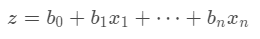

In [30]:
# X_test[0] = 1 이 될 확률 
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
print(val) 
sigmoid(val) # sigmoid 함수에 적용 

[4.73309707]


array([0.99127757])

In [29]:
# 위의 sigmoid 함수에 적용한 결과값과 동일함을 알 수 있음 
# array([0.99127757]) = 9.91277573e-01

lrc.predict_proba(X_test[:5])

array([[8.72242699e-03, 9.91277573e-01],
       [2.41622685e-01, 7.58377315e-01],
       [1.00000000e+00, 1.21217433e-10],
       [6.40861429e-07, 9.99999359e-01],
       [3.25148309e-04, 9.99674852e-01]])

- 다중 분류 (softmax 함수 활용)

In [35]:
# 데이터 불러오기
from sklearn.datasets import load_wine
wine = load_wine()
# 정규화
wine_std = StandardScaler().fit_transform(wine.data)
# tain/test
X_train,X_test,y_train,y_test=train_test_split(
    wine_std, wine.target, stratify = wine.target, random_state=2022) # test-size=0.5
# Logistic 회귀 학습 
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [37]:
# 예측값 확인 
print(lrc2.predict_proba(X_test[:5]), '\n') 
print(lrc2.predict(X_test[:5]))

# 아래서 'softmax' 함수를 정의하여 구한 결과값과 lrc2.predict_proba 결과값 비교!
# array([9.98395362e-01, 3.09638037e-04, 1.29499998e-03])


[[9.99279600e-01 4.12995370e-04 3.07404430e-04]
 [9.95459920e-01 3.04646714e-03 1.49361273e-03]
 [8.63617063e-03 1.34269693e-04 9.91229560e-01]
 [7.75565213e-03 3.10436345e-03 9.89139984e-01]
 [9.94151690e-04 9.89722631e-01 9.28321721e-03]] 

[0 0 2 2 1]


In [38]:
# 계수(coefficient)
lrc2.coef_

array([[ 0.73292343,  0.24529243,  0.4625104 , -0.83327624,  0.03787191,
         0.2198092 ,  0.64010231, -0.16699086,  0.15389364,  0.14377882,
         0.12029171,  0.67911303,  1.0101582 ],
       [-0.91395256, -0.48165767, -0.83332071,  0.59074468, -0.08596402,
        -0.01348885,  0.34230068,  0.17131402,  0.23534429, -0.96864414,
         0.66757359,  0.04717943, -1.09745204],
       [ 0.18102913,  0.23636524,  0.37081031,  0.24253157,  0.04809211,
        -0.20632035, -0.98240299, -0.00432316, -0.38923793,  0.82486532,
        -0.7878653 , -0.72629246,  0.08729384]])

In [39]:
# 절편(intercept)
lrc2.intercept_

array([ 0.38394662,  0.67109374, -1.05504036])

In [47]:
# shape 확인 
print('lrc2.coef_:', lrc2.coef_.shape, '\n','X_test[0]:', X_test[0].shape)
# 
val2 = np.dot(lrc2.coef_, X_test[0]) + lrc.intercept_
val2

lrc2.coef_: (3, 13) 
 X_test[0]: (13,)


array([ 5.09538194, -2.9831187 , -1.55225673])

In [43]:
sigmoid(val2)

array([0.99391232, 0.04819437, 0.17476056])

In [48]:
# softmax 함수도 제공 X, 직접 만들어야 함!
#def softmax(x1, x2, x3):
  #np.exp(x1) / np.sum(np.exp(x1) + np.exp(x2) + np.exp(x3))
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

In [49]:
softmax(val2) # 최종 결과

array([9.98395362e-01, 3.09638037e-04, 1.29499998e-03])

In [50]:
# 3개의 값 모두 더하면 = 1
np.sum(softmax(val2))
# 왜 1이 아니지..? ୧(๑•̀ᗝ•́)૭

0.9999999999999998

[참조]
- https://hleecaster.com/ml-logistic-regression-concept/
- 로지스틱스 함수 : https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%95%A8%EC%88%98
- Sigmoid : https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98